In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
original_data= pd.read_csv("top_ecommerce_brands.csv")

In [4]:
original_data.head()

,brand_name,founded_year,founder,country
0,Amazon,1994,Jeff Bezos,USA
1,Alibaba,1999,Jack Ma,China
2,Shopify,2006,Tobias Lütke,Canada
3,PDD Holdings,2015,Colin Huang,China
4,MercadoLibre,1999,Marcos Galperin,Argentina


In [5]:
print("\n" + "="*60)
print("                 EXPLORATORY DATA ANALYSIS")
print("="*60)

# Basic info
print("\nData types and missing values:")
print(original_data.info())

print("\nDescriptive statistics:")
print(original_data.describe(include='all'))

print("\nCountries distribution:")
print(original_data['country'].value_counts())

print("\nFounding years range:", original_data['founded_year'].min(), "–", original_data['founded_year'].max())

# Visualizations
plt.style.use('seaborn-v0_8-pastel')


                 EXPLORATORY DATA ANALYSIS

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand_name    66 non-null     object
 1   founded_year  66 non-null     int64 
 2   founder       66 non-null     object
 3   country       66 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.2+ KB
None

Descriptive statistics:
       brand_name  founded_year     founder country
count          66     66.000000          66      66
unique         66           NaN          66      20
top        Amazon           NaN  Jeff Bezos     USA
freq            1           NaN           1      20
mean          NaN   2003.590909         NaN     NaN
std           NaN     12.995830         NaN     NaN
min           NaN   1929.000000         NaN     NaN
25%           NaN   1999.000000         NaN     NaN
50%           NaN   20

In [6]:
cleaned_data=original_data.copy()
print(cleaned_data.head())

     brand_name  founded_year          founder    country
0        Amazon          1994       Jeff Bezos        USA
1       Alibaba          1999          Jack Ma      China
2       Shopify          2006     Tobias Lütke     Canada
3  PDD Holdings          2015      Colin Huang      China
4  MercadoLibre          1999  Marcos Galperin  Argentina


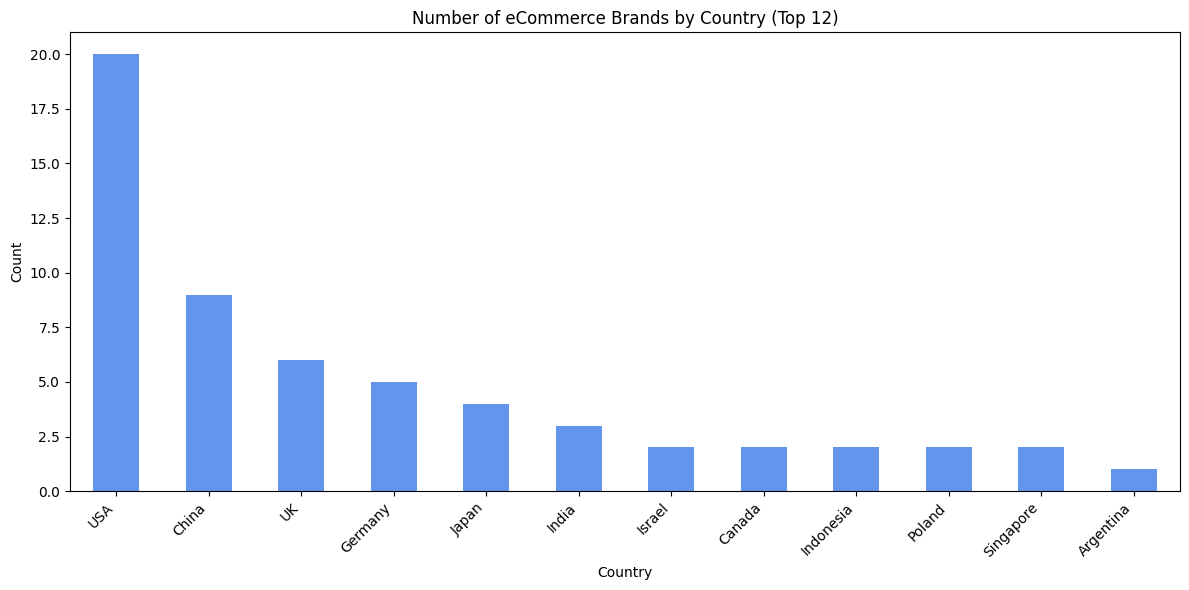

In [7]:
# 1. Brands per country
plt.figure(figsize=(12, 6))
cleaned_data['country'].value_counts().head(12).plot(kind='bar', color='cornflowerblue')
plt.title('Number of eCommerce Brands by Country (Top 12)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

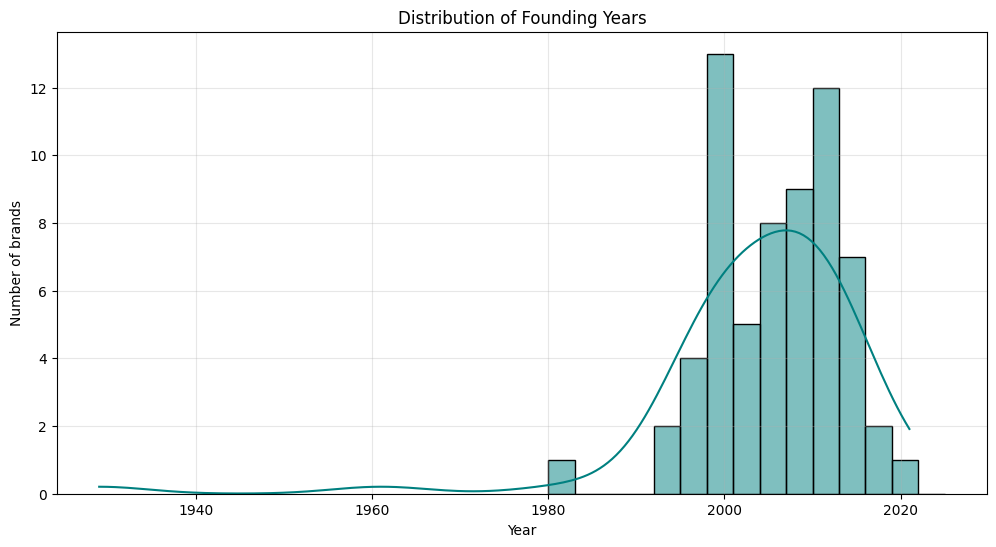

In [8]:
# 2. Founding years histogram
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_data['founded_year'], bins=range(1980, 2026, 3), kde=True, color='teal')
plt.title('Distribution of Founding Years')
plt.xlabel('Year')
plt.ylabel('Number of brands')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# ────────────────────────────────────────────────
# 3. Very simple predictive modeling example
#    (Predicting something fictional – e.g. simulating market relevance score)
# ────────────────────────────────────────────────

print("\n" + "="*60)
print("          BASIC PREDICTIVE MODELING EXAMPLE")
print("="*60)

# Create a fake numeric target for demonstration (you can replace with real data)
# Here: fake "success_score" = higher for more recent + USA/Europe/China brands
cleaned_data['decade'] = (cleaned_data['founded_year'] // 10) * 10
cleaned_data['success_score'] = 2025 - cleaned_data['founded_year'] + \
                      cleaned_data['country'].isin(['USA', 'China', 'Germany', 'UK', 'Canada']).astype(int) * 15

X = cleaned_data[['founded_year', 'country']]
y = cleaned_data['success_score']

# Preprocessing + model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['country'])
    ], remainder='passthrough')

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score:           {r2:.3f}  (on this toy target)")


          BASIC PREDICTIVE MODELING EXAMPLE
Mean Squared Error: 3.06
R² Score:           0.972  (on this toy target)


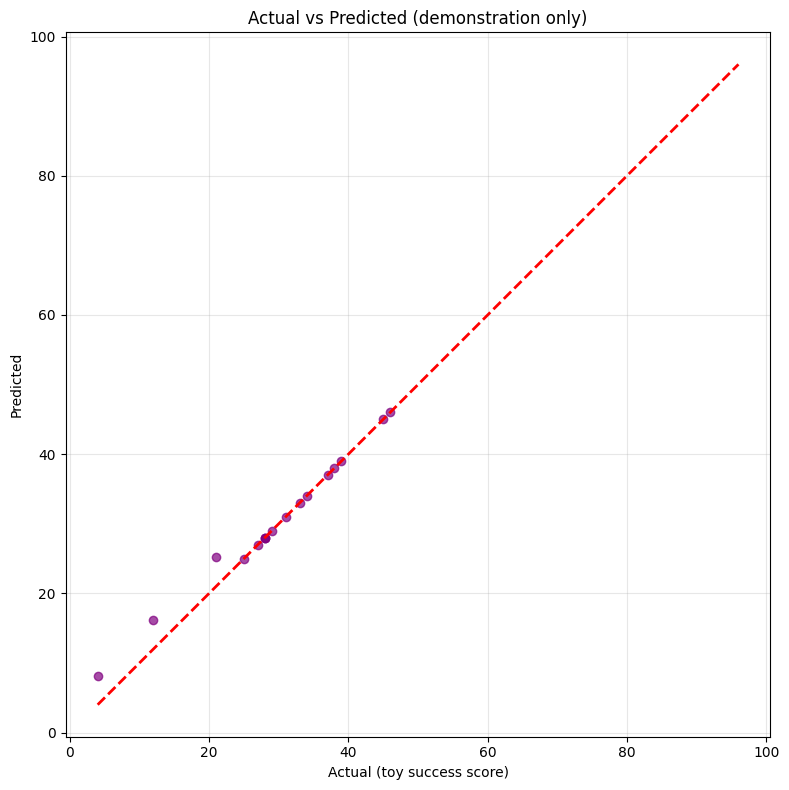

In [11]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual (toy success score)')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (demonstration only)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

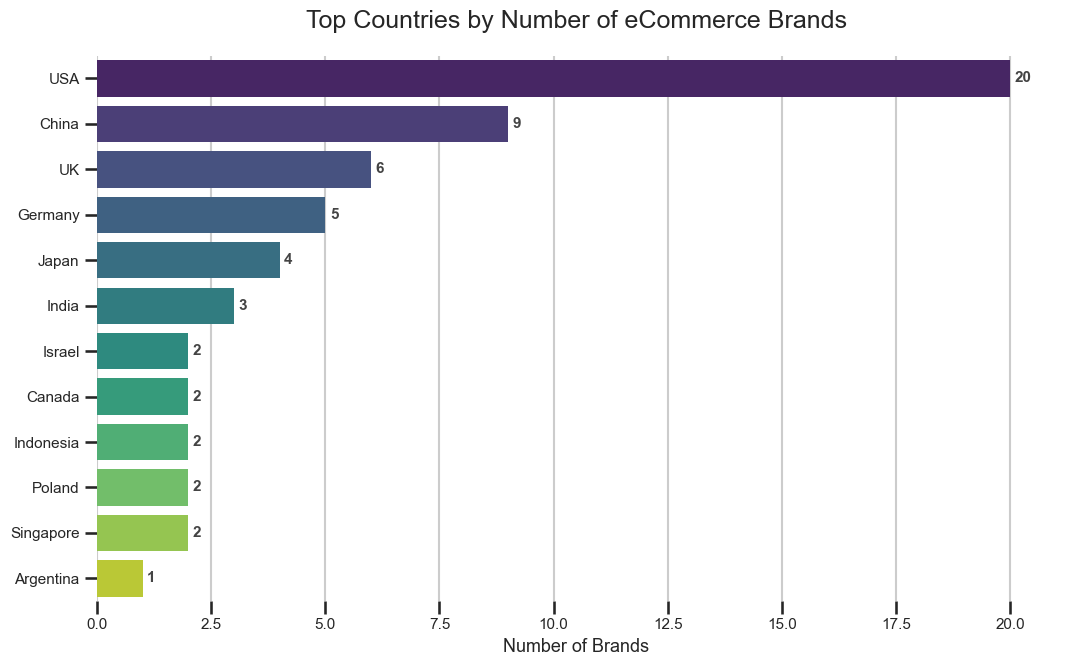

In [12]:
# ──── Better global look ─────────────────────────────────────────────────────
plt.style.use('seaborn-v0_8-whitegrid')           # clean white background + grid
sns.set_palette("husl")                           # nice colorful but soft palette
sns.set_context("talk")                           # bigger fonts for presentations

# Optional: dark mode version (uncomment if you prefer)
# plt.style.use('dark_background')
# sns.set_palette("rocket")

# ──── 1. Horizontal Bar – Top Countries (with value labels) ──────────────────
plt.figure(figsize=(11, 7))

country_counts = cleaned_data['country'].value_counts().head(12)
bars = sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")

# Add value labels on bars
for bar in bars.patches:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             va='center', fontsize=11, fontweight='bold', color='#444')

plt.title("Top Countries by Number of eCommerce Brands", fontsize=18, pad=20)
plt.xlabel("Number of Brands", fontsize=13)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
sns.despine(left=True, bottom=True)               # remove unnecessary spines
plt.tight_layout()
plt.show()

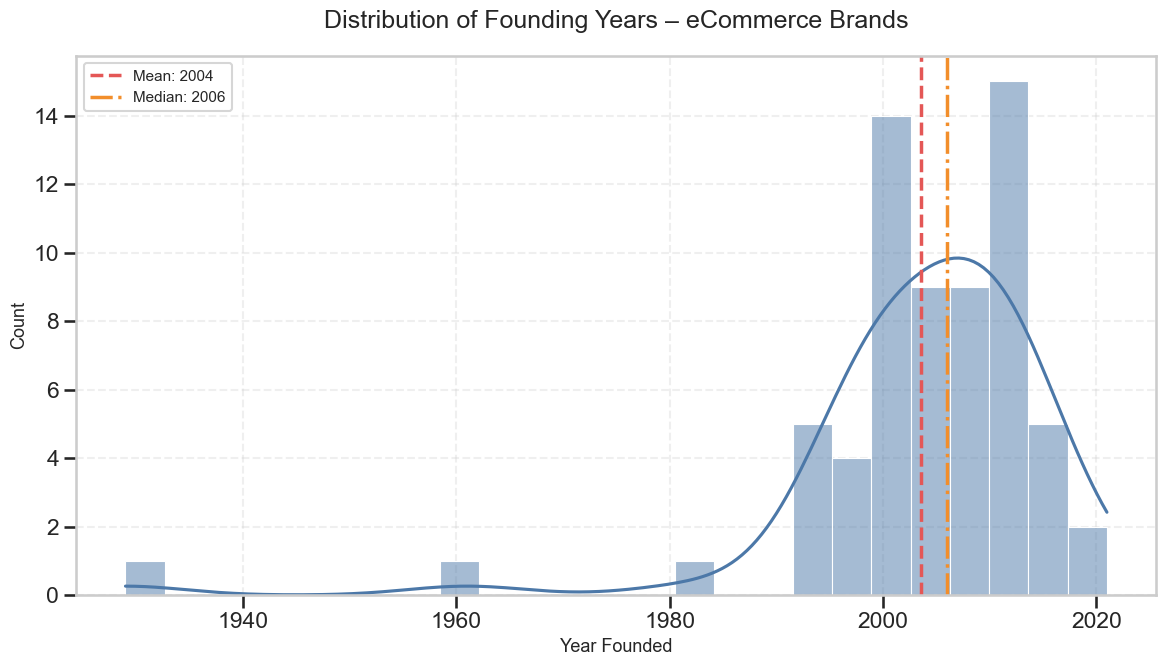

In [13]:
# ──── 2. Histogram + KDE with mean/median annotation ─────────────────────────
plt.figure(figsize=(12, 7))

sns.histplot(data=cleaned_data, x='founded_year', bins=25, kde=True,
             color='#4c78a8', edgecolor='white', linewidth=0.8)

# Add vertical lines for mean & median
mean_year = cleaned_data['founded_year'].mean()
median_year = cleaned_data['founded_year'].median()

plt.axvline(mean_year, color='#e45756', linestyle='--', linewidth=2.5,
            label=f'Mean: {mean_year:.0f}')
plt.axvline(median_year, color='#f28e2b', linestyle='-.', linewidth=2.5,
            label=f'Median: {median_year:.0f}')

plt.title("Distribution of Founding Years – eCommerce Brands", fontsize=18, pad=20)
plt.xlabel("Year Founded", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.legend(fontsize=11, loc='upper left', frameon=True)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


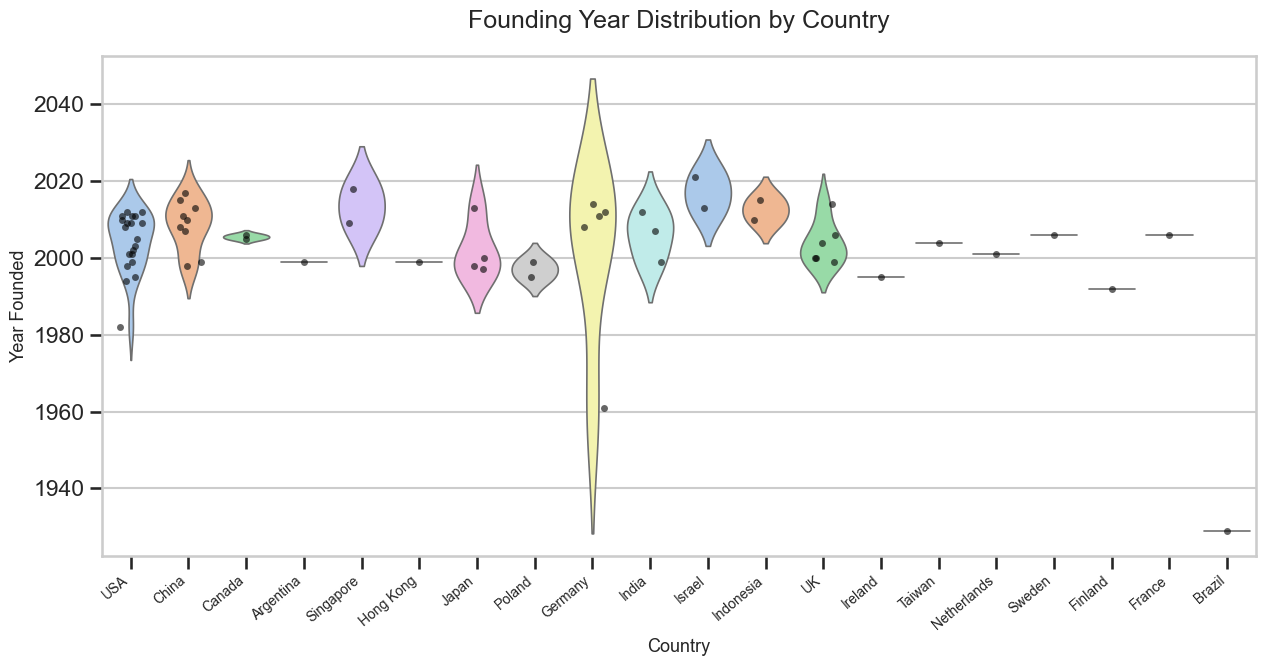

In [14]:
# ──── 3. Violin + Strip plot combo (nice for seeing distribution + individuals) ─
plt.figure(figsize=(13, 7))

sns.violinplot(data=cleaned_data, x='country', y='founded_year',
               inner=None, palette="pastel", linewidth=1.2)

sns.stripplot(data=cleaned_data, x='country', y='founded_year',
              color='black', alpha=0.6, size=5, jitter=0.22, edgecolor='gray')

plt.title("Founding Year Distribution by Country", fontsize=18, pad=20)
plt.xlabel("Country", fontsize=13)
plt.ylabel("Year Founded", fontsize=13)
plt.xticks(rotation=40, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

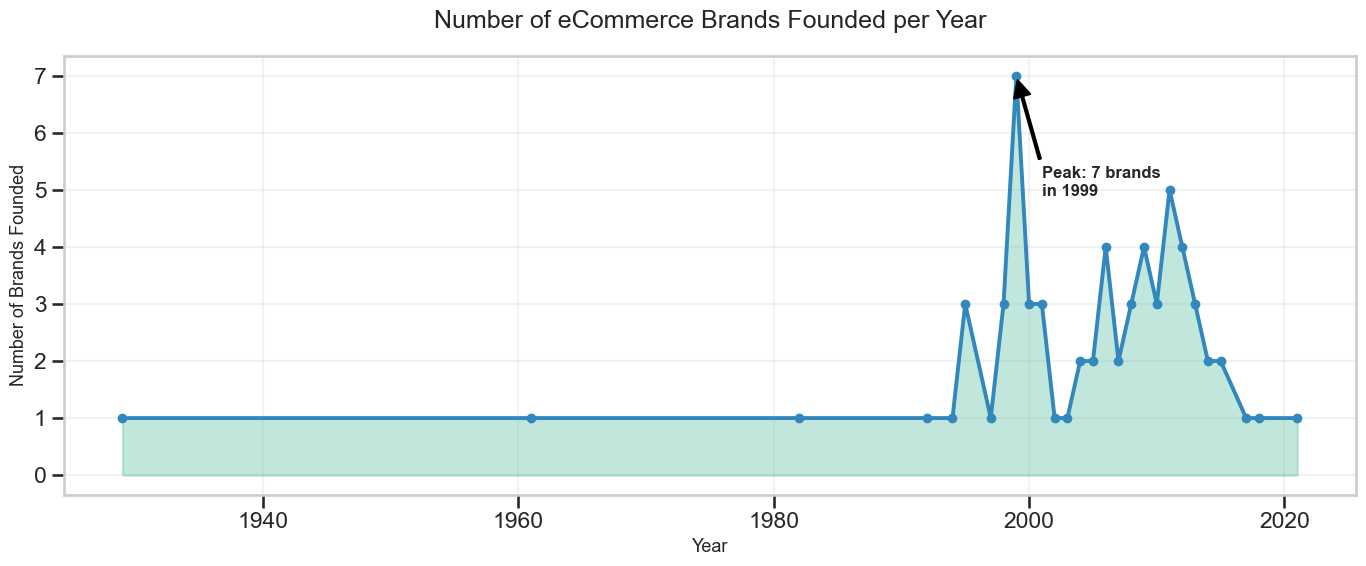

In [15]:
# ──── 4. Timeline – Brands founded per year (step / area chart) ───────────────
yearly = cleaned_data['founded_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))

# Area chart
plt.fill_between(yearly.index, yearly.values, color='#66c2a5', alpha=0.4)
# Line on top
plt.plot(yearly.index, yearly.values, color='#3288bd', linewidth=2.8, marker='o', markersize=6)

# Annotate peak year
peak_year = yearly.idxmax()
peak_count = yearly.max()
plt.annotate(f'Peak: {peak_count} brands\nin {peak_year}',
             xy=(peak_year, peak_count), xytext=(peak_year+2, peak_count*0.7),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12, fontweight='bold')

plt.title("Number of eCommerce Brands Founded per Year", fontsize=18, pad=20)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Number of Brands Founded", fontsize=13)
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

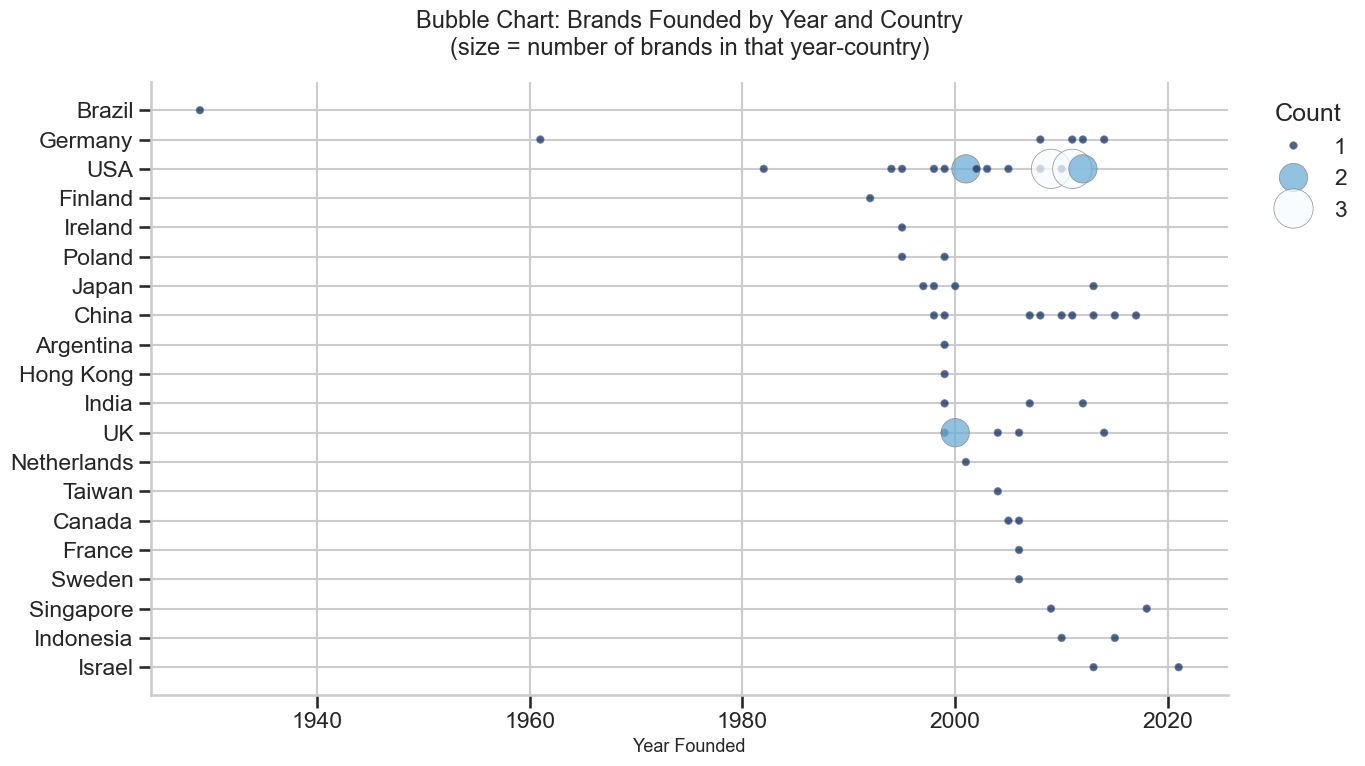

In [16]:
# ──── 5. Bubble chart – Founding year vs Country (size = count per year-country) ─
count_per_year_country = cleaned_data.groupby(['founded_year', 'country']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))

bubble = sns.scatterplot(data=count_per_year_country,
                        x='founded_year', y='country',
                        size='count', sizes=(30, 800),
                        hue='count', palette="Blues_r",
                        alpha=0.75, edgecolor='gray', linewidth=0.6)

plt.title("Bubble Chart: Brands Founded by Year and Country\n(size = number of brands in that year-country)", 
          fontsize=17, pad=20)
plt.xlabel("Year Founded", fontsize=13)
plt.ylabel("")
plt.legend(title="Count", bbox_to_anchor=(1.02, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

In [17]:
cleaned_data.to_csv("cleaned_top_ecommerce_brands_data.csv",index=False)